<a href="https://colab.research.google.com/github/HeleneFabia/nlp-exploration/blob/main/notebooks/nlp_with_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP with NLTK

In [1]:
import nltk

## Tokenizing

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download("punkt")

In [23]:
# splitting a text into sentences and words
example_string = (
    "Societies construct patterns of behavior by deeming certain " 
    "actions or concepts as acceptable or unacceptable. These patterns of " 
    "behavior within a given society are known as societal norms. Societies, "
    "and their norms, undergo gradual and perpetual changes."
    )

sentences = sent_tokenize(example_string)
words = word_tokenize(sentences[0])
print(sentences)
print(words)

['Societies construct patterns of behavior by deeming certain actions or concepts as acceptable or unacceptable.', 'These patterns of behavior within a given society are known as societal norms.', 'Societies, and their norms, undergo gradual and perpetual changes.']
['Societies', 'construct', 'patterns', 'of', 'behavior', 'by', 'deeming', 'certain', 'actions', 'or', 'concepts', 'as', 'acceptable', 'or', 'unacceptable', '.']


## Filtering Stop Words

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

In [72]:
text = "I'm a happy person, at least most of the time."
words = word_tokenize(text)
print(words)

stop_words = set(stopwords.words("english"))
filtered_list = [word for word in words if word.casefold() not in stop_words]
# .casefold() to make it case-insensitive
print(filtered_list)

['I', "'m", 'a', 'happy', 'person', ',', 'at', 'least', 'most', 'of', 'the', 'time', '.']
["'m", 'happy', 'person', ',', 'least', 'time', '.']


## Stemming
(= reducing a word to its root)

In [29]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")
words = word_tokenize(sentences[0])
stemmed_words = [stemmer.stem(word) for word in words]
print("Unstemmed:", words)
print("Stemmed:", stemmed_words)

# understemming: when two related words should be reduced to the same stem but are not (FN)
# overstemming: when two unrelated words are reduced to the same stem but should not be (FP)

Unstemmed: ['Societies', 'construct', 'patterns', 'of', 'behavior', 'by', 'deeming', 'certain', 'actions', 'or', 'concepts', 'as', 'acceptable', 'or', 'unacceptable', '.']
Stemmed: ['societi', 'construct', 'pattern', 'of', 'behavior', 'by', 'deem', 'certain', 'action', 'or', 'concept', 'as', 'accept', 'or', 'unaccept', '.']


## Parts of Speech (POS) tagging 
(noun, pronoun, adjective, verb, adverb, preposition, conjunction, interjection, determiner)

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

In [35]:
for w, pos in nltk.pos_tag(words):
  print(f"{w} --- {pos}")

# nltk.help.upenn_tagset() for POS descriptions

Societies --- NNS
construct --- VBP
patterns --- NNS
of --- IN
behavior --- NN
by --- IN
deeming --- VBG
certain --- JJ
actions --- NNS
or --- CC
concepts --- NNS
as --- IN
acceptable --- JJ
or --- CC
unacceptable --- JJ
. --- .


## Lemmatizing
(= reduce word to its core meaning, but returns an actual word rather than only a fragment when stemming)

lemma = word that represents a whole group of words (= lexeme)

e.g. "swimming" --> lemma is "swim", "swimming" is part of the lexeme

In [ ]:
nltk.download('wordnet')

In [82]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("beautifully"))
print(lemmatizer.lemmatize("boats"))
print(lemmatizer.lemmatize("loved"))
print(lemmatizer.lemmatize("loved", pos="v"))
print(lemmatizer.lemmatize("worst"))
print(lemmatizer.lemmatize("worst", pos="a"))

beautifully
boat
loved
love
worst
bad


## Chunking
(= identify phrases)

uses POS tags to group and chunk words

In [25]:
quote = "It's a dangerous business, Frodo, going out your door."
words = nltk.word_tokenize(quote)
pos_tags = nltk.pos_tag(words)

chunk_grammar = "NP: {<DT>?<JJ>*<NN>}"  # rule combination for how sentences should be chunked
# chunk noun phrases (NP)
# start with optional (?) determiner (DT)
# have any number (*) of adjectives (JJ)
# end with a noun (NN)

chunk_parser = nltk.RegexpParser(chunk_grammar)
tree = chunk_parser.parse(pos_tags)

print(tree)

(S
  It/PRP
  's/VBZ
  (NP a/DT dangerous/JJ business/NN)
  ,/,
  Frodo/NNP
  ,/,
  going/VBG
  out/RP
  your/PRP$
  (NP door/NN)
  ./.)


## Chinking
like chunking, but instead of *including* a pattern, it *excludes* a pattern

In [24]:
chink_grammar = """
Chunk: {<.*>+}
       }<JJ>{"""
# {<.*>+} -- include everything
# }<JJ>{ -- exclude adjectives

chunk_parser = nltk.RegexpParser(chink_grammar)
tree = chunk_parser.parse(pos_tags)

print(tree)

(S
  (Chunk It/PRP 's/VBZ a/DT)
  dangerous/JJ
  (Chunk
    business/NN
    ,/,
    Frodo/NNP
    ,/,
    going/VBG
    out/RP
    your/PRP$
    door/NN
    ./.))


## Named Entity Recognition (NER)

(ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, PERCENT, FACILITY, GPE)

In [ ]:
nltk.download("maxent_ne_chunker")
nltk.download("words")

In [32]:
text = "Yann André LeCun, born July 8, 1960) is a French computer scientist working primarily in the fields of machine learning, computer vision, mobile robotics, and computational neuroscience."

In [50]:
def extract_ne(text):
  words = word_tokenize(text)
  tags = nltk.pos_tag(words)
  tree = nltk.ne_chunk(tags, binary=True)
  return set(
      " ".join(i[0] for i in t)
      for t in tree
      if hasattr(t, "label") and t.label() == "NE"
  )

In [51]:
extract_ne(text)

{'French', 'Yann André LeCun'}

## Using corpora

In [ ]:
nltk.download("book")

In [53]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Concordance

In [56]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

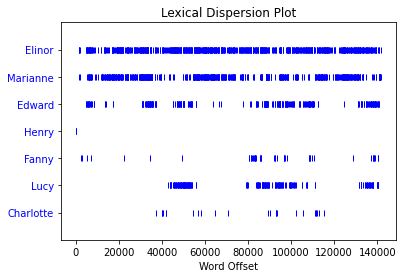

In [67]:
text2.dispersion_plot(["Elinor", "Marianne", "Edward", "Henry", "Fanny", "Lucy", "Charlotte"])

# each blue line represents one instance of a word
# each horizontal row of blue lines represents corpus as a whole

# use dispersion plot to see where words who up in a corpus/text

## Frequency Distribution

In [68]:
from nltk import FreqDist

[(',', 539), ('.', 353), ('/', 110), ('for', 99), ('and', 74), ('to', 74), ('lady', 68), ('-', 66), ('seeks', 60), ('a', 52), ('with', 44), ('S', 36), ('ship', 33), ('&', 30), ('relationship', 29), ('fun', 28), ('in', 27), ('slim', 27), ('build', 27), ('o', 26)]
[(',', 539), ('.', 353), ('/', 110), ('lady', 68), ('-', 66), ('seeks', 60), ('ship', 33), ('&', 30), ('relationship', 29), ('fun', 28), ('slim', 27), ('build', 27), ('smoker', 23), ('50', 23), ('non', 22), ('movies', 22), ('good', 21), ('honest', 20), ('dining', 19), ('rship', 18)]


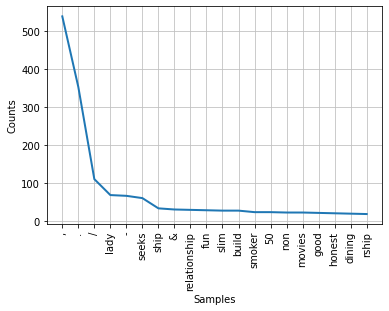

In [78]:
freq_dist1 = FreqDist(text8)
print(freq_dist1.most_common(20))

meaningful_words = [word for word in text8 if word.casefold() not in stop_words]
freq_dist2 = FreqDist(meaningful_words)
print(freq_dist2.most_common(20))
freq_dist2.plot(20, cumulative=False)

## Collocations

= sequence of words frequently occurring together

In [79]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


In [83]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in text8]
new_text = nltk.Text(lemmatized_words)
new_text.collocations()

medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; weekend away; well presented; never
married; single mum; permanent relationship; year old; slim build
